# Operations
Represents a graph node that performs computation on tensors

An ```Operation``` is a node in a TensorFlow ```graph``` that takes zero or more ```Tensor``` objects as input, and produces zero or more ```Tensor``` objects as output.

After the graph has been launched in a session, an ```Operation``` can be executed by passing it to ```tf.Session.run```.

In [22]:
import tensorflow as tf

In [23]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

In [24]:
print("a: {}".format(123), "b: {}".format(456))

a: 123 b: 456


In [25]:
# Launch the default graph.
with tf.Session() as sess:
    #print "a: %i" % sess.run(a), "b: %i" % sess.run(b)
    print("a: {}".format(sess.run(a)), "b: {}".format(sess.run(b)))
    #print "Addition with constants: %i" % sess.run(a+b)
    print("Addition with constants: {}".format(sess.run(a+b))) #in fact, tf.add(a,b)
    #print "Multiplication with constants: %i" % sess.run(a*b)
    print("Multiplication with constants: {}".format(sess.run(a*b))) #in fact, tf.add(a,b)

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [26]:
print(tf.get_default_graph().as_graph_def().node)

[name: "Const"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
      }
      int_val: 2
    }
  }
}
, name: "Const_1"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
      }
      int_val: 3
    }
  }
}
, name: "add"
op: "Add"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
, name: "mul"
op: "Mul"
input: "Const"
input: "Const_1"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
]


In [15]:
from graphviz import Digraph

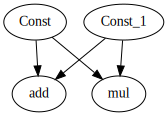

In [16]:
dot = Digraph()
for n in tf.get_default_graph().as_graph_def().node:
    dot.node(n.name, label=n.name)
    for i in n.input:
        dot.edge(i, n.name)
dot

In [27]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [28]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)
tf.summary.FileWriter('./matmul',tf.get_default_graph().as_graph_def())

In [29]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    #print "Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3})
    print("Addition with variables: {}".format(sess.run(add, feed_dict={a: 2, b: 3})))
    print("Multiplication with variables: {}".format(sess.run(mul, feed_dict={a: 2, b: 3})))

Addition with variables: 5
Multiplication with variables: 6


In [30]:
tf.reset_default_graph()

In [31]:
# ----------------
# More in details:
# Matrix Multiplication from TensorFlow official tutorial

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

In [32]:
# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

In [33]:
# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)


In [35]:
# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of threes ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]
